In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('Channels order: {}'.format(K.image_data_format()))

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Channels order: channels_last


In [5]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

60000 10000 60000 10000


In [6]:
input_shape

(28, 28, 1)

In [7]:
# Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Let's see some insights
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

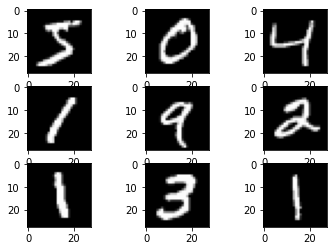

In [10]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
for i in range(9):
    print(y_train[i])

5
0
4
1
9
2
1
3
1


In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
for i in range(9):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

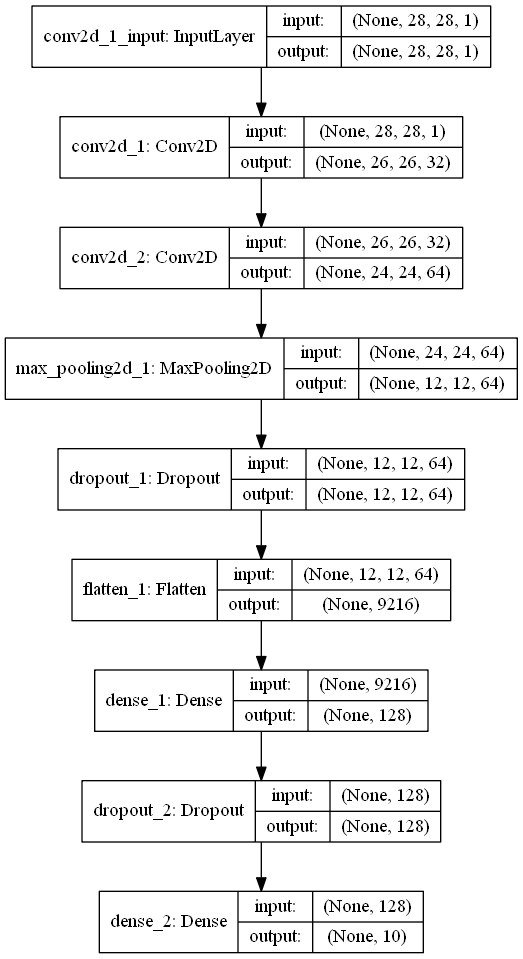

In [16]:
# If this cell throws an error follow the instructions: https://stackoverflow.com/a/43509785/5341726
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
result = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2633 - acc: 0.9186 - val_loss: 0.0591 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0879 - acc: 0.9734 - val_loss: 0.0443 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0674 - acc: 0.9799 - val_loss: 0.0352 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0545 - acc: 0.9836 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0275 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0418 - acc: 0.9869 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0362 - acc: 0.9891 - val_loss: 0.0262 - val_acc

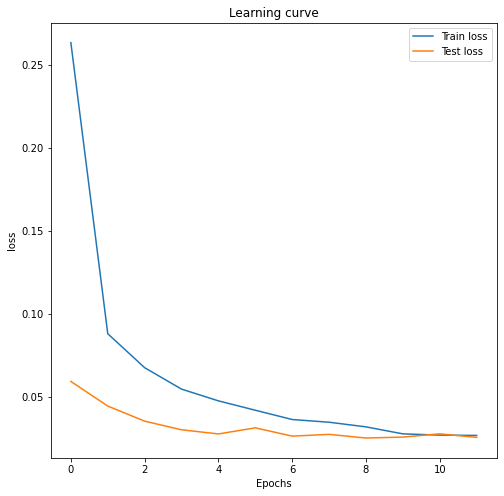

In [19]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="Train loss")
plt.plot(result.history["val_loss"], label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();

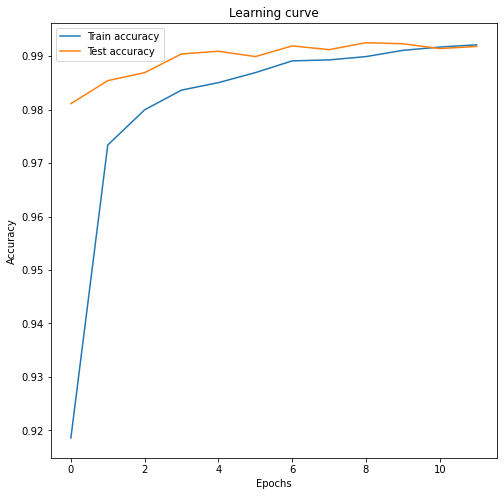

In [20]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["acc"], label="Train accuracy")
plt.plot(result.history["val_acc"], label="Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)

In [22]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025398620109999683
Test accuracy: 0.9918


In [23]:
# change this number and run all the cells below
random_test = 100

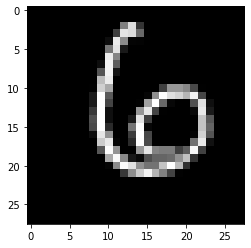

In [24]:
plt.imshow(x_test[random_test].reshape((28,28)), cmap=plt.get_cmap('gray'))

In [25]:
prediction = model.predict(np.expand_dims(x_test[random_test], axis = 0))

In [26]:
print('Predicted value: {}'.format(prediction))

Predicted value: [[6.0589365e-08 1.2936341e-12 1.1332965e-13 7.0535644e-15 2.6342409e-12
  1.9420915e-10 9.9999988e-01 5.9960843e-16 1.5282516e-10 3.5706592e-16]]


In [27]:
print('Predicted value: {}'.format(np.argmax(prediction))) 

Predicted value: 6


In [28]:
print('True value: {}'.format(y_test[random_test]))

True value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [29]:
print('True value: {}'.format(np.argmax(y_test[random_test])))

True value: 6
